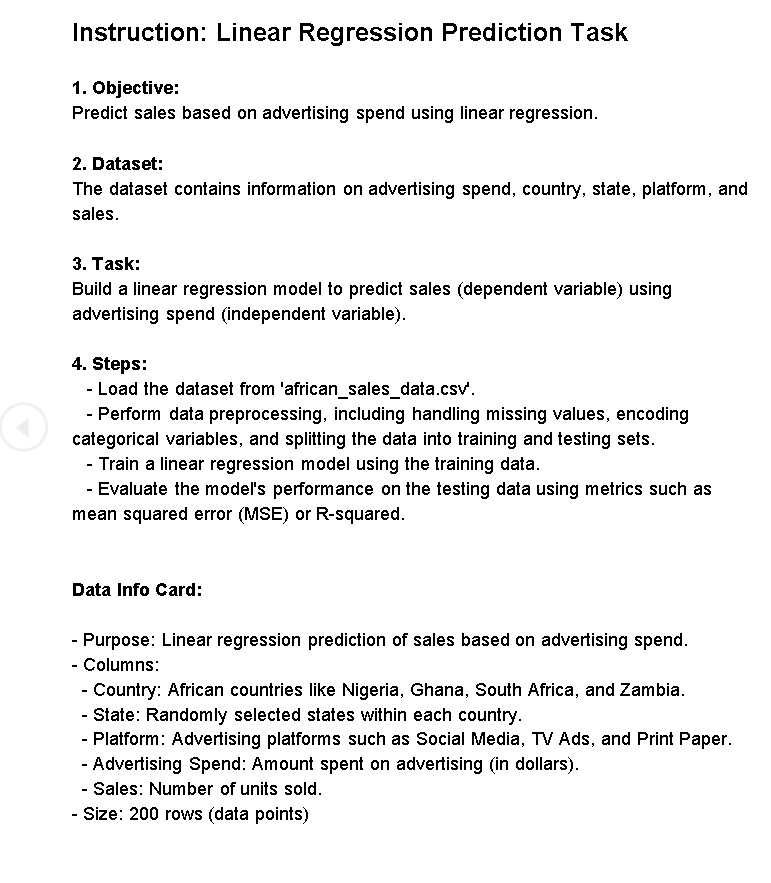



## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import seaborn as sns
pd.set_option('display.max_rows', None)

C:\Users\eMARS COMPUTERS\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Data Loading

In [2]:
data= pd.read_csv(r"C:\Users\eMARS COMPUTERS\Documents\DataDiva\african_sales_data.csv")

In [3]:
data

,Country,State,Platform,Advertising Spend,Sales
0,Nigeria,Accra,TV Ads,3195.254016,801.714395
1,Nigeria,Lusaka,Social Media,3860.757465,714.158342
2,Nigeria,Johannesburg,TV Ads,3411.053504,617.463836
3,Zambia,Lusaka,Print Paper,3179.532732,642.124542
4,Ghana,Lagos,Social Media,2694.619197,539.120594
5,Nigeria,Johannesburg,Print Paper,3583.576452,959.668496
6,Zambia,Accra,Social Media,2750.348845,695.011850
7,Nigeria,Lusaka,Social Media,4567.092003,972.173525
8,South Africa,Johannesburg,Print Paper,4854.651042,898.386657
9,Nigeria,Lusaka,Social Media,2533.766075,641.189513


## Data Preprocessing

In [4]:
data.shape
#200 rows and 5 colums

(200, 5)

In [5]:
data.info()
#there are no missing values and the datatype is correct

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            200 non-null    object 
 1   State              200 non-null    object 
 2   Platform           200 non-null    object 
 3   Advertising Spend  200 non-null    float64
 4   Sales              200 non-null    float64
dtypes: float64(2), object(3)
memory usage: 7.9+ KB


In [6]:
data.duplicated().sum()
#there are no duplicates

0

In [7]:
data.describe().T
#the spread of the data is high
#Features with wider ranges or more spread-out distributions likely have different scales compared to features 
#with narrower ranges or tighter distributions. so we need to perform scaling

,count,mean,std,min,25%,50%,75%,max
Advertising Spend,200.0,3001.751192,1138.504886,1018.781905,2008.627951,3161.031972,3861.895303,4995.388026
Sales,200.0,639.123049,235.588218,135.746149,422.972592,644.139670,810.321437,1150.473789


In [8]:
#checking for outliers
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
IQR = q3 -q1

lower_limit = q1 - (1.5 * IQR)
upper_limit = q3 + (1.5 * IQR)
lower_limit, upper_limit


(Advertising Spend   -771.273077
 Sales               -158.050676
 dtype: float64,
 Advertising Spend    6641.796331
 Sales                1391.344704
 dtype: float64)

In [9]:
data[(data<lower_limit)| (data > upper_limit)]

#there are no outliers in the data

C:\Users\eMARS COMPUTERS\AppData\Local\Temp\ipykernel_14268\1428414493.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data[(data<lower_limit)| (data > upper_limit)]


,Country,State,Platform,Advertising Spend,Sales
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN


In [10]:
#check for the unique values in the categorical data 
data['Country'].unique()

array(['Nigeria', 'Zambia', 'Ghana', 'South Africa'], dtype=object)

In [11]:
data['State'].unique()

array(['Accra', 'Lusaka', 'Johannesburg', 'Lagos'], dtype=object)

In [12]:
data['Platform'].unique()

array(['TV Ads', 'Social Media', 'Print Paper'], dtype=object)

## Data Splitting

In [13]:
#Split the data

X= data[['Advertising Spend']]
y= data[['Sales']]
X.shape, y.shape

((200, 1), (200, 1))

In [14]:
#Create a linear regression

reg= LinearRegression()

In [15]:
#split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state = 42)

#print out the shape of the training and testing sets
print("Training set shape: ", X_train.shape, y_train.shape)
print("Testing set shape: ", X_test.shape, y_test.shape)

Training set shape:  (160, 1) (160, 1)
Testing set shape:  (40, 1) (40, 1)


In [16]:
#fit the model on the training set - this is how the model learns
reg.fit(X_train, y_train)

LinearRegression()

In [17]:
#predict on the testing set
#y_pred is the predicted value of the sales based on the advertising spend
#once we have those preds, we can compare them to the actual value of the sales variable
#We do that to evaluate the perfomance of the model
y_pred = reg.predict(X_test)

In [18]:
#Evaluate the performance of the model
r2 = r2_score(y_test, y_pred)#variance of the sales explained by the advertising spend
                             #how well the model fits the data. Higher is better(0-1)
mse = mean_squared_error(y_test, y_pred)#average squared distance between the predicted and actual value. Lower is better
mae = mean_absolute_error(y_test, y_pred)#average absolute distance(sometimes negative that's why absolue).Lower is better
intercept = reg.intercept_#starting point on the regression line on the y_axis

print("R2 score: ", r2)
print("Mean squared error: ", mse)
print("Mean absolute error: ", mae)
print("Intercept: ", intercept)

R2 score:  0.8456890632356663
Mean squared error:  7344.902362143752
Mean absolute error:  69.42940012138563
Intercept:  [75.74646516]


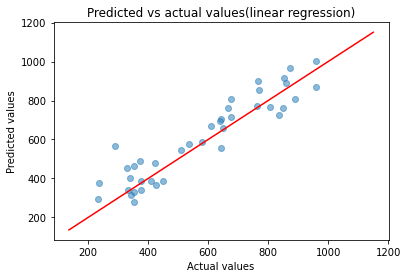

In [19]:
#Let's plot the predicted value versus the actual values
#Predicted values will be on the x_axis
#actual values will be on the y_axis
#if the model is a good fit, the points should be close to the diagonal line indicating a stong linear relationship
#between the predicted and actual value

plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()],[y.min(), y.max()], color='red')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Predicted vs actual values(linear regression)')
plt.show()

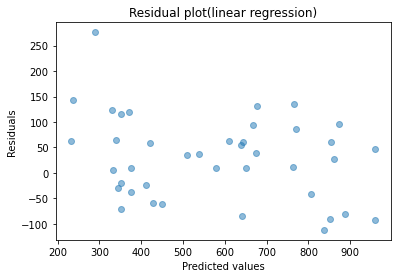

In [20]:
#Now, let's plot the residuals
#The residuals are plotted against the predicted values of the sales
#If the linear regression is a good fit for the data,
#the residual plot should show a random scatter of the point around zero with no discernable trend

plt.scatter(y_test, y_pred - y_test, alpha=0.5)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual plot(linear regression)')
plt.show()